In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
fechaYHora = pd.read_csv('/home/jonathan/events.csv',low_memory = False)

In [6]:
fechaYHora.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Convierto 'timestamp' a formato fecha 
fechaYHora['timestamp'] = pd.to_datetime(fechaYHora['timestamp'])

In [8]:
#Cantidad de eventos por mes
fechaYHora['timestamp'].dt.month.value_counts().sort_index()

1     19270
2     27886
3     77293
4    130008
5    474949
6    281882
Name: timestamp, dtype: int64

In [9]:
#Cantidad de eventos por dia
fechaYHora['timestamp'].dt.day.value_counts().sort_index()

1     30984
2     33117
3     32135
4     36935
5     41200
6     36820
7     37758
8     33972
9     33194
10    33462
11    37481
12    34938
13    35752
14    42755
15    48568
16    33058
17    32145
18    28813
19    26849
20    25957
21    29987
22    30810
23    29591
24    26363
25    26493
26    25803
27    26253
28    30384
29    32550
30    33481
31    23680
Name: timestamp, dtype: int64

## Calculo del porcentaje promedio de personas por dia en Trocafone

In [5]:

#Cantidad de personas por mes
personasPorDia = fechaYHora[['person','timestamp']]

#Agrego una columna dias
personasPorDia['dias'] = personasPorDia['timestamp'].dt.day


/home/jonathan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
ppd = personasPorDia.groupby('dias')['person'].count()
totalVisitas = ppd.sum()
ppdia = ppd.reset_index().rename(columns = {'person':'cantidad'})
#Aqui ya tengo el porcentaje en una columna
ppdia['porcentaje'] = (ppdia['cantidad']/totalVisitas)*100


Text(0,0.5,'Porcentaje')

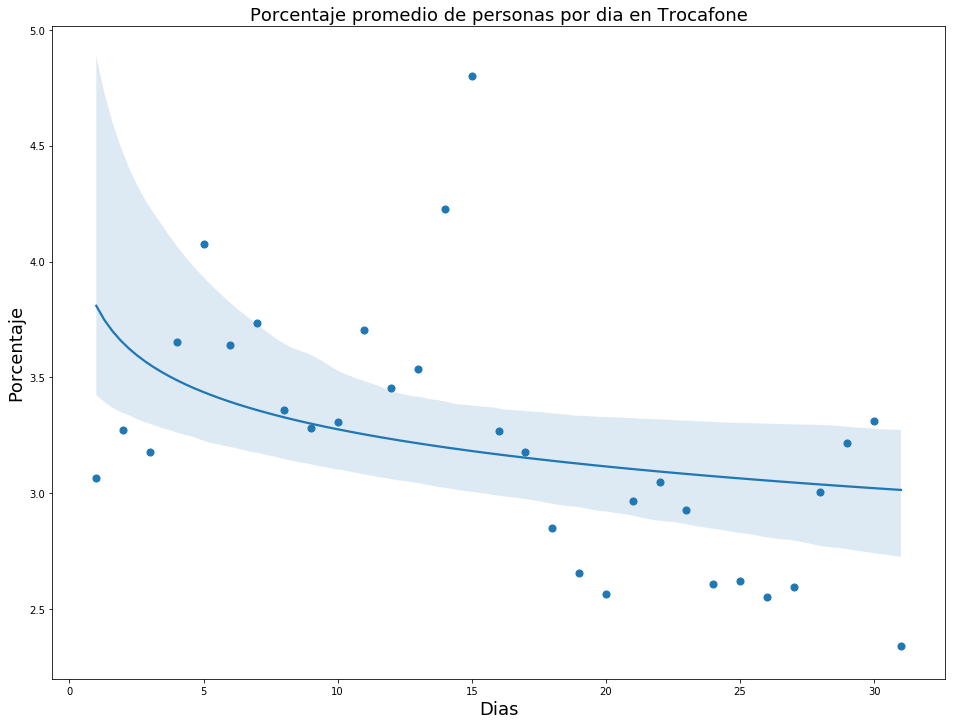

In [45]:
plt.figure(figsize=(16,12))
ax = sns.regplot(x="dias", y="porcentaje", data=ppdia,\
               x_estimator=np.mean, logx=True, truncate=True)
plt.title('Porcentaje promedio de personas por dia en Trocafone', fontsize = 18)
plt.xlabel('Dias', fontsize = 18)
plt.ylabel('Porcentaje', fontsize = 18)


**Se puede observar una cantidad porcentual maxima en la mitad de cada mes **

Text(0,0.5,'Conversiones')

<Figure size 1152x864 with 0 Axes>

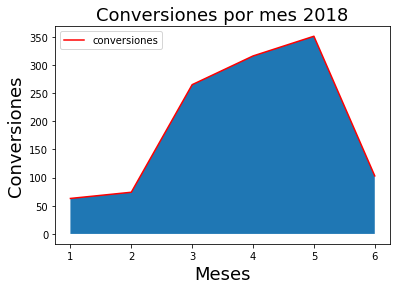

In [31]:
#Cantidad de conversiones por mes

mesesYConversiones = pd.DataFrame( data = ((fechaYHora[(fechaYHora['event'] == 'conversion')])['timestamp']\
                       .dt.month.value_counts().sort_index()))
mesesYConversiones = mesesYConversiones.reset_index()
mesesYConversiones.rename(columns={'index': 'mes', 'timestamp':'conversiones'}, inplace=True)
mesesYConversiones.plot(x='mes', y='conversiones', colormap="autumn")
# Area plot
x=mesesYConversiones.mes
y=mesesYConversiones.conversiones
plt.fill_between(x, y)

plt.title('Conversiones por mes 2018', fontsize = 18)
plt.xlabel('Meses', fontsize = 18)
plt.ylabel('Conversiones', fontsize = 18)


Text(0,0.5,'Conversiones')

<Figure size 1152x864 with 0 Axes>

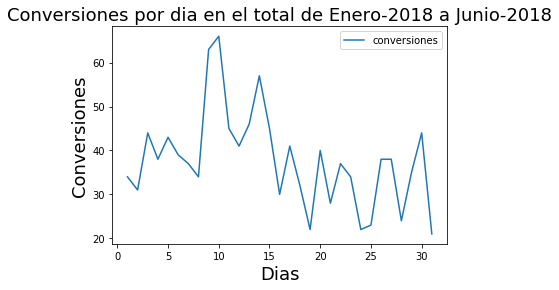

In [32]:
#Cantidad de conversiones por dia en el total de meses
diasYConversiones = pd.DataFrame( data = ((fechaYHora[(fechaYHora['event'] == 'conversion')])['timestamp']\
                      .dt.day.value_counts().sort_index()))
diasYConversiones = diasYConversiones.reset_index()
diasYConversiones.rename(columns={'index': 'dia', 'timestamp':'conversiones'}, inplace=True)

diasYConversiones.plot(x='dia', y='conversiones')
plt.title('Conversiones por dia en el total de Enero-2018 a Junio-2018', fontsize = 18)
plt.xlabel('Dias', fontsize = 18)
plt.ylabel('Conversiones', fontsize = 18)


**Parece que el 10mo dia del mes "es un buen dia" para realizar una compra, esto se podria deber a 
 disposicion de credito en tarjetas por parte del comprador y/o tambien a la fecha de cobro, 
aunque estas son suposiciones debido a los eventos limitados a 6 meses.**

## Comparacion de conversiones en el mes de Enero y Junio

In [42]:
#Agrego columnas por separado
fechaYHora['dia'] =  fechaYHora['timestamp'].dt.day
fechaYHora['mes'] =  fechaYHora['timestamp'].dt.month
fechaYHora['anio'] =  fechaYHora['timestamp'].dt.year

In [15]:
enero = fechaYHora[(fechaYHora['event'] == 'conversion') & (fechaYHora['mes'] == 1)]
enero.groupby('mes')['event'].value_counts()

#Se puede ver un total de 63 conversiones en el mes de Enero

mes  event     
1    conversion    63
Name: event, dtype: int64

In [16]:
junio = fechaYHora[(fechaYHora['event'] == 'conversion') & (fechaYHora['mes'] == 6)]
junio.groupby('mes')['event'].value_counts()
#Se puede ver un total de 103 conversiones en el mes de junio

mes  event     
6    conversion    103
Name: event, dtype: int64

Text(0,0.5,'Conversiones')

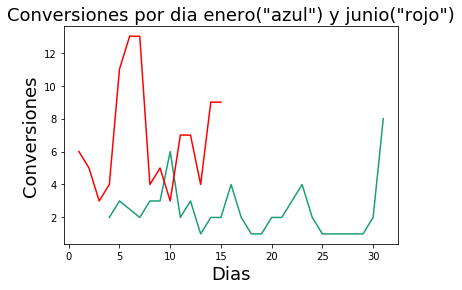

In [17]:
enero = enero[['dia','event']]
january = enero.groupby('dia')['event'].count()
january.plot(x=january.index , y = january.values, cmap = "Dark2")

junio = junio[['dia','event']]
june = junio.groupby('dia')['event'].count()
june.plot(x=june.index , y = june.values, cmap = "autumn")

plt.title('Conversiones por dia enero("azul") y junio("rojo")', fontsize = 18)
plt.xlabel('Dias', fontsize = 18)
plt.ylabel('Conversiones', fontsize = 18)

**Se puede notar que los dias de mas venta en junio son 6,7 en cambio en en enero el dia de mas venta es al finalizar el mes, esto se podria deber a la cantidad de personas ocupadas en actividades turisticas en esta epoca (vacaciones).**

In [18]:
fechaYHora.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version', 'dia', 'mes', 'anio'],
      dtype='object')

## Cual es la hora de mas eventos en Brasil?

In [34]:
#creo una columna hora
fechaYHora['hora'] = fechaYHora['timestamp'].dt.hour

In [35]:
#Filtro por pais: Brazil

brazilTimeVisits = fechaYHora[(fechaYHora['country'] == 'Brazil')]

In [36]:
brazilVisits = brazilTimeVisits[['country','hora']].groupby('hora')['country'].count()

brazilVisits

hora
0     5055
1     4722
2     3686
3     2425
4     1361
5      773
6      442
7      360
8      441
9      884
10    1740
11    3128
12    4184
13    4822
14    5206
15    5117
16    5313
17    5082
18    5013
19    4842
20    4734
21    4790
22    4858
23    5330
Name: country, dtype: int64

In [37]:
#Vista de eventos respecto a horas en Brasil

labels = brazilVisits.index
stats = np.log(brazilVisits.values)

def drawRadarChart(labels,stats,title):
  
    #Seteo los angulos de las etiquetas
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    #Creo un plot cerrado
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    fig= plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)

    ax.grid(True)

    fig.text(0.5, 1.00, title,horizontalalignment='center', color='black', weight='bold', size='large')

<Figure size 1152x864 with 0 Axes>

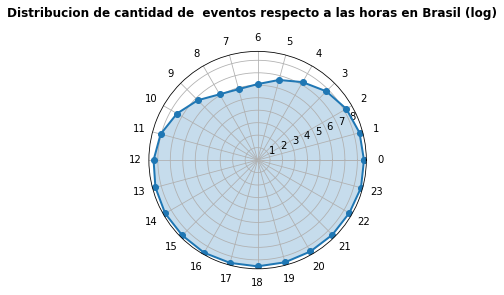

In [38]:
drawRadarChart(labels = labels, stats =stats, title = "Distribucion de cantidad de  eventos respecto a las horas en Brasil (log)")

## Distribucion de visitas al sitio respecto a las horas en Argentina

In [48]:
convArgentina = fechaYHora[(fechaYHora['event'] == 'visited site') & (fechaYHora['country'] == 'Argentina')]
cA = pd.DataFrame(data = convArgentina.groupby('hora')['event'].count())
cA.rename(columns = { 'event' : 'visitasPorHora'},inplace = True)
convArg = cA.reset_index()

Text(0.5,1,'Horas de visitas al sitio en Argentina')

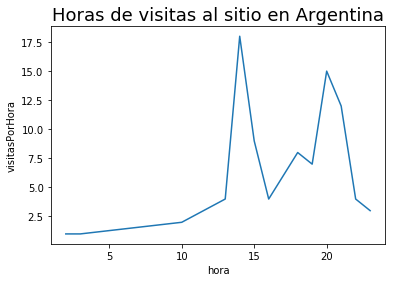

In [281]:
ax = sns.lineplot(x="hora", y="visitasPorHora", data=convArg)
plt.title('Horas de visitas al sitio en Argentina', fontsize = 18)

**Se ve que la cantidad de visitas al sitio es mayor a las 14hs o  las 20hs.**

### Ciudades con mas eventos en Brazil ?

In [27]:
brazilCities = fechaYHora[(fechaYHora['country'] == 'Brazil')  & (fechaYHora['event'])]
#Filtro por ciudades mas importantes
braC = brazilCities['city'].dropna().value_counts()
braC


Unknown                   13373
São Paulo                 11711
Rio de Janeiro             3538
Belo Horizonte             2568
Salvador                   2314
Brasília                   1530
Osasco                     1148
Curitiba                   1132
Fortaleza                  1084
Recife                      913
Goiânia                     853
Porto Alegre                799
Guarulhos                   776
São Bernardo do Campo       716
Belém                       640
São Luís                    597
Manaus                      507
Natal                       487
Montes Claros               482
Campinas                    471
Barueri                     466
Santo André                 434
Duque de Caxias             429
Petrolina                   424
Teresina                    388
Sorocaba                    376
Campo Grande                373
Maceió                      370
Contagem                    348
Nova Iguaçu                 311
                          ...  
Itamogi 

**Se puede ver una gran cantidad de eventos desde 'Unknown' por un tema de falta de procedencia no parece relevante considerarlo en este analisis(podria provenir de cualquier ciudad o de una unica ciudad). Por ende la de mas relevancia
sera Sao Paulo**

### Ciudades de mas eventos en Argentina?

In [28]:
argentinaCities = fechaYHora[(fechaYHora['country'] == 'Argentina') & (fechaYHora['event'])]
argC = argentinaCities['city'].dropna().value_counts()
argC

Buenos Aires       76
Unknown             8
Córdoba             2
Lomas de Zamora     1
Ramos Mejia         1
Podesta             1
Mendoza             1
Lanus               1
Isidro Casanova     1
Neuquén             1
Rosario             1
Name: city, dtype: int64

**Entonces la capital Bs As es la de mas participacion como era de esperarse**

### Ciudades de mas eventos en USA?

In [29]:
usaCities = fechaYHora[(fechaYHora['country'] == 'United States')  & (fechaYHora['event'])]
usaC = usaCities['city'].dropna().value_counts()
usaC

Mountain View        131
The Bronx             88
Unknown               58
Palo Alto             18
Fremont               17
Alameda               10
Collierville          10
Denver                10
New York               9
San Jose               7
Seattle                7
Fort Worth             7
San Francisco          7
Fairfield              7
Dallas                 7
Clifton                4
Dearborn               4
Newark                 4
Newington              4
Northbrook             3
Los Angeles            3
Saint Paul             3
Somerset               3
North Bergen           3
Miami                  3
Santa Clara            3
Flushing               3
Jersey City            3
Melrose Park           2
Reading                2
Las Vegas              2
Harrisburg             2
San Ramon              2
Chattanooga            1
Raritan                1
Detroit                1
Atlanta                1
Chicago                1
Hopkins                1
Bentonville            1


**Se aprecia Mountain view liderando por cantidad de eventos, una ciudad del condado de Santa Clara, California
  Ademas fue la primer ciudad en recibir internet inalambrica provista por Google en el 2006. Fuente: Wikipedia**

## Como se comportan las conversiones a lo largo de los 6 meses en las ciudades de mayor cantidad en eventos de los paises de mayor relevancia?

In [40]:
#Me quedo con las ciudades de mayor relevancia(mayor cantidad en eventos)
ciudades = ["São Paulo", "Rio de Janeiro", "Buenos Aires", "Mountain View", "The Bronx"]

In [43]:
#Filtro del dataframe por las ciudades
nuevoCities = fechaYHora[(fechaYHora['city'].isin(ciudades))]
#Me quedo ademas con las personas que acceden desde tales ciudades
nuevoCities = nuevoCities[['mes','person','city',]]

#Armo otro df y me quedo con las las conversiones y personas
nuevoConversiones = fechaYHora[(fechaYHora['person'].isin(nuevoCities['person'].values)) &\
                               (fechaYHora['event'] == 'conversion') ]
nuevoConversiones.sort_values(by = 'mes')

nuevoConversiones =  nuevoConversiones[['event','mes','person']]

nueC = nuevoConversiones.groupby('person')['event'].count().reset_index()
nueC.rename(columns = {'event':'cantidadConversiones'},inplace = True)

#join
join = pd.merge(nueC, nuevoCities, how='right', on='person')
join.dropna()['city'].value_counts()


São Paulo         1813
Rio de Janeiro     495
Buenos Aires         6
Name: city, dtype: int64

<Figure size 1152x864 with 0 Axes>

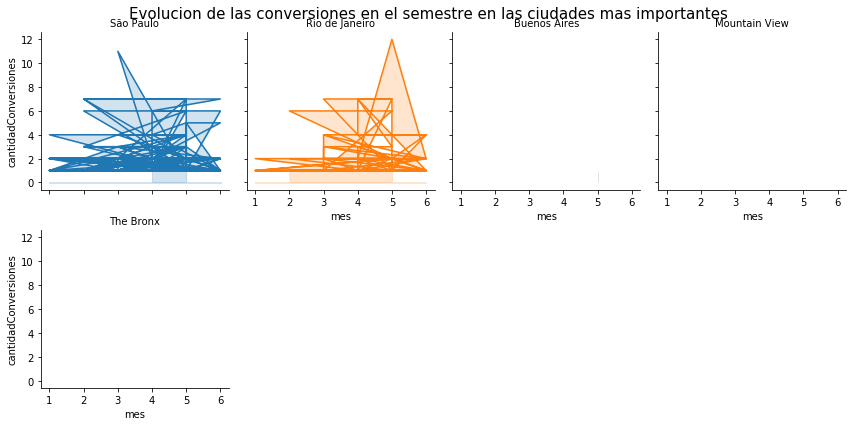

In [44]:

#plot
g = sns.FacetGrid(join, col='city', hue='city', col_wrap=4, )
 
# Agrego el line plot 
g = g.map(plt.plot, 'mes', 'cantidadConversiones')
 
# Relleno el area entre lineas
g = g.map(plt.fill_between, 'mes', 'cantidadConversiones', alpha=0.2).set_titles("{col_name} city")
 
# Titulo de cada 'facet'
g = g.set_titles("{col_name}")

plt.subplots_adjust(top=.92)

g = g.fig.suptitle('Evolucion de las conversiones en el semestre en las ciudades mas importantes', fontsize = 15)
 



**Se puede observar que las conversiones ocurren en Sao Paulo seguido de Rio de Janeiro en su mayoria y en Buenos Aires solo una cantidad de 6 la cual no es visible ademas Mountain View no realiza conversiones y The Bronx tampoco.**